###Import Basic Kit

In [ ]:
%pip install gurobipy
import gurobipy as grb
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
import scipy.optimize as opt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 23.6 MB/s 


In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-06-17 13:34:57--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.253.115.113, 172.253.115.100, 172.253.115.102, ...
Connecting to drive.google.com (drive.google.com)|172.253.115.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5nf2tsq1lfdhubjm8ttfre7li9es0o01/1655472825000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-06-17 13:34:58--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5nf2tsq1lfdhubjm8ttfre7li9es0o01/1655472825000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.188.33, 2607:f8b0:4004:835::2001
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|142.250.

## Keywords
- 咖啡廳(coffee shop)
- 甜點(dessert)
- 輕食(light meal)
- 貓(cat)
- cafe


In [ ]:
keywords = ["咖啡廳","甜點","輕食","貓","cafe"]
keywords

['咖啡廳', '甜點', '輕食', '貓', 'cafe']

## Find out CPC and CTR for each rank
$CTR_{kt}=ae^{-bX_{kt}}$  
$CPC_{kt}=ce^{-dX_{kt}}$  
- maximize clicks  
> Objective function: Max (CTR*impression)  
> Decision Variable: average daily rank of the keyword  
> Constraints: cost≤budget, 1≤rank≤5  

# Q2



In [ ]:
TotalSearch = np.array([450000, 90500, 8100, 74000, 74000])
a = np.array([30, 25, 21, 16.5, 14])
b = np.array([0.3, 0.3, 0.3, 0.3, 0.3])
c = np.array([1.25, 1.06, 0.9, 0.8, 0.6])
d = np.array([0.1, 0.1, 0.1, 0.1, 0.1])

def objective(t):
  CTR_S = a * np.exp(-b * t) * TotalSearch /100
  # print(CTR_S)
  return sum(CTR_S)
def constr(t):
  CPC = c * np.exp(-d * t)
  CTR = a * np.exp(-b * t)
  # print("CTR", CTR)
  # print("CPC", CPC)
  Cost = CPC * CTR * TotalSearch /100
  # print("cost", Cost)
  return sum(Cost)

MAX_BUDGET = 90000
MAX_CLICK = 0
rank = np.array([0, 0, 0, 0, 0])
budget = 0

for i in range(1,6):
  for j in range(1,6):
    for k in range(1,6):
      for l in range(1,6):
        for m in range(1,6):
          rank_permutation = np.array([i, j, k, l, m])
          if constr(rank_permutation) < MAX_BUDGET and MAX_CLICK < objective(rank_permutation):
            MAX_CLICK = objective(rank_permutation)
            rank = rank_permutation
            budget = constr(rank_permutation)
            #print(rank, MAX_CLICK, budget)
for i in range(5):
  print("【%s】:Rank"%keywords[i],rank[i])
print("Total clicks:",MAX_CLICK)
print("Budget usage:",budget)

【咖啡廳】:Rank 2
【甜點】:Rank 5
【輕食】:Rank 5
【貓】:Rank 1
【cafe】:Rank 1
Total clicks: 96237.70238925064
Budget usage: 89991.52152594378


In [ ]:
for i in range(5):
  print("【%s】"%keywords[i])
  print("CTR(%):",a * np.exp(-b * i))
  print("CPC($):",c * np.exp(-d * i))

【咖啡廳】
CTR(%): [30.  25.  21.  16.5 14. ]
CPC($): [3.25 3.06 2.4  2.   1.68]
【甜點】
CTR(%): [22.22454662 18.52045552 15.55718263 12.22350064 10.37145509]
CPC($): [2.94072161 2.7688025  2.1716098  1.80967484 1.52012686]
【輕食】
CTR(%): [16.46434908 13.7202909  11.52504436  9.055392    7.68336291]
CPC($): [2.66087495 2.5053161  1.96495381 1.63746151 1.37546767]
【貓】
CTR(%): [12.19708979 10.16424149  8.53796285  6.70839939  5.69197524]
CPC($): [2.40765922 2.26690376 1.77796373 1.48163644 1.24457461]
【cafe】
CTR(%): [9.03582636 7.5298553  6.32507845 4.9697045  4.21671897]
CPC($): [2.17854015 2.05117934 1.60876811 1.34064009 1.12613768]


#Q3

In [ ]:
# I actually made up new variable to look more realistic
TotalSearch = np.array([450000, 90500, 8100, 74000, 74000])
a = np.array([30, 25, 21, 16.5, 14])
b = np.array([0.3, 0.3, 0.3, 0.3, 0.3])
c = np.array([3.25, 3.06, 2.4, 2, 1.68])
d = np.array([0.1, 0.1, 0.1, 0.1, 0.1])

#We need a model that maximizes Profit using IMP and RPC
def objective(rank_of_each_keywords, IMP, RPC):
  CPC = c * np.exp(-d * rank_of_each_keywords)
  CTR = a * np.exp(-b * rank_of_each_keywords)
  Cost = CPC * CTR * IMP / 100
  Revenue = CTR * IMP * RPC / 100

  for i in range(5):
    if rank_of_each_keywords[i] == 0:
      Cost[i] = 0
      Revenue[i] = 0

  return sum(Revenue-Cost)

def constr(rank_of_each_keywords, IMP):

  CPC = c * np.exp(-d * rank_of_each_keywords)
  CTR = a * np.exp(-b * rank_of_each_keywords)
  Cost = CPC * CTR * IMP / 100

  for i in range(5):
    if rank_of_each_keywords[i] == 0:
      Cost[i] = 0

  return sum(Cost)

#Then we need the function to output:
# 1) Revenue 2) Rank for each keyword

def magic():
  MAX_BUDGET = 6000
  max_profit = 0
  rank = np.array([5, 5, 5, 5, 5])
  SIM_LEN = 1000

  price_tri = [101, 190, 400]
  IMP_tri   = [1000, np.random.randint(1000, 3000), np.random.randint(3000, 5000)]#refer to forecasting IMP below
  # each simulation will have different price assumption and IMP
  # price is an array have five variables, each representing the revenue we get of each keyword in each simulation
  # IMP is an array have five variables, each representing the impression we get of each keyword in each simulation
  price = [np.sum(np.random.triangular(price_tri[0], price_tri[1], price_tri[2], SIM_LEN)) / SIM_LEN * np.random.randint(1, 3) for i in range(5)]
  IMP   = [np.sum(np.random.triangular(IMP_tri[0], IMP_tri[1], IMP_tri[2], SIM_LEN)) / SIM_LEN * np.random.randint(1, 10) for i in range(5)]

  # is_bought
  RPC = [0, 0, 0, 0, 0]
  for i in range(5):
    isbought = np.sum([np.random.binomial(n=2, p=0.2, size=round(IMP[i]))]) / round(IMP[i])
    RPC[i] = price[i] * isbought

  # print(IMP, RPC)
  # print(price)

  for i in range(0,6):
    for j in range(0,6):
      for k in range(0,6):
        for l in range(0,6):
          for m in range(0,6):
            rank_permutation = np.array([i, j, k, l, m])
            if constr(rank_permutation, IMP) < MAX_BUDGET and max_profit < objective(rank_permutation, IMP, RPC):
              max_profit = objective(rank_permutation, IMP, RPC)
              rank = rank_permutation
  return rank, max_profit

#Then we run a for loop 1000 times (each time will have different IMP and RPC)
SIMULATION_TIMES = 1000
best_profits = []
best_rank_combinations = []
for i in range(SIMULATION_TIMES):
  rank_combination, profit = magic()

  best_profits.append(profit)
  best_rank_combinations.append(rank_combination)

print(best_profits)
print(best_rank_combinations)

[643042.8043704185, 527365.8917700879, 358967.71908408124, 380637.11407966807, 635276.5610547577, 539811.186848971, 478480.11128308374, 751879.2654345651, 350658.4134052666, 517456.9773306032, 478454.3318814667, 572105.2527183618, 457693.35673563404, 649662.2463422848, 578285.6933869233, 646175.345882963, 516452.2391311082, 414735.70582327584, 437333.63884173566, 670600.7480554678, 553670.6165397284, 405480.65731418825, 678626.1605961742, 316627.5750558168, 503238.4252886867, 595929.2660892444, 568580.0471248223, 351646.0301421042, 616504.8151459006, 553135.515189956, 651675.9642210446, 636335.1615979522, 553475.3827304121, 339788.46977670264, 645650.1113882323, 637825.4013339364, 511010.9332610403, 395903.4192785743, 502615.94802539784, 521426.1008032439, 477156.29016695195, 330942.1149211578, 562401.2542568566, 698713.5362115181, 358690.87878948264, 460785.09688738786, 636693.9816966513, 421970.19461374637, 568370.4118123078, 440498.6400944819, 374703.15748946916, 542182.7056154057, 

Counter({0: 1000})
Counter({5: 328, 0: 247, 4: 186, 3: 113, 1: 66, 2: 60})
Counter({1: 198, 5: 185, 4: 173, 2: 169, 3: 153, 0: 122})
Counter({1: 418, 2: 174, 5: 123, 3: 122, 4: 115, 0: 48})
Counter({1: 555, 2: 151, 3: 104, 4: 85, 5: 80, 0: 25})


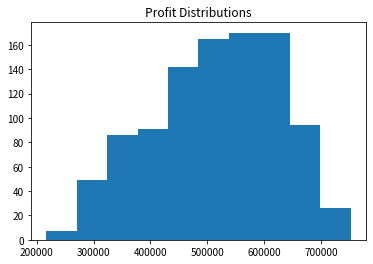

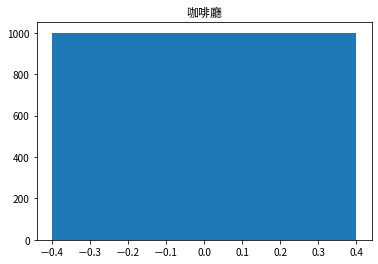

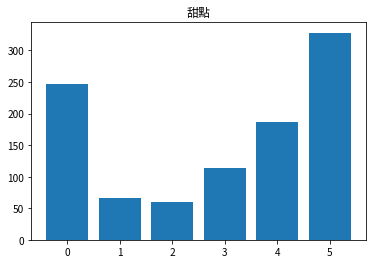

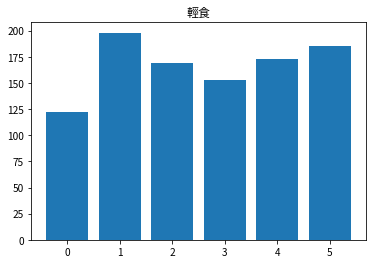

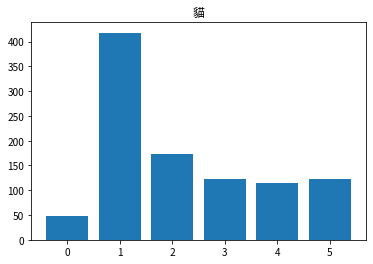

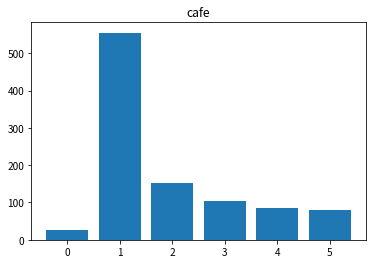

In [ ]:
#We will have the the revenue in 1000 situations and
 the ranks on each of the situations
import collections
def count_frequency(t):
  keyword_best_rank = []
  for i in range(1000):

    keyword_best_rank.append(best_rank_combinations[i][t])

  # print(keyword_best_rank)
  keyword_tmp = collections.Counter(keyword_best_rank)
  # print(keyword_tmp)
  return keyword_tmp

for i in range(5):
  print(count_frequency(i))

#Then we plot the revenues of the 1000 simlations
plt.hist(best_profits)
plt.title("Profit Distributions")
plt.show()

#Then for each keyword, say what was the rank that appeared te most (example: cafe was in rank 3 most of the time, 咖啡廳 was rank 2 most of the time)
for i in range(5):
  w=count_frequency(i)
  plt.title(keywords["Keywords"][i])
  plt.bar(w.keys(), w.values())
  plt.show()

In [ ]:
#forecasting IMP
#以下是exponential smoothing的code
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

sh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1q7IyOug3DcQyrPpzDCJIQlec2dLTeARbzotOnlzvW6c/edit?usp=sharing')
print(sh.worksheets())
worksheet = sh.get_worksheet(0)
# worksheet = sh.worksheet("IMP(google trend)")

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows[3])

# Convert to a DataFrame and render.
import pandas as pd
df_trend = pd.DataFrame.from_records(rows[4:])
df_trend.columns = rows[3]
df_trend.head()

[<Worksheet '工作表1' id:0>]
['Week', '咖啡廳: (Taiwan)', '甜點: (Taiwan)', '輕食: (Taiwan)', '貓: (Taiwan)', 'cafe: (Taiwan)']


,Week,咖啡廳: (Taiwan),甜點: (Taiwan),輕食: (Taiwan),貓: (Taiwan),cafe: (Taiwan)
0,2021/6/13,3,12,1,86,5
1,2021/6/20,3,13,2,91,5
2,2021/6/27,3,13,2,85,5
3,2021/7/4,3,13,1,82,5
4,2021/7/11,3,13,2,86,5


In [ ]:
#exponential smoothing
df_exponential_smoothing = pd.DataFrame(columns=rows[3])

def getMSE_exp(alpha):
  for i in range(0, len(df_trend)):
    week = ''
    tmp = []
    for key in df_exponential_smoothing:
      if key == 'Week':
        week = df_trend[key][i]
        continue
      if i == 0:
        exp = float(df_trend[key][i])
      else:
        exp = alpha*float(df_trend[key][i-1])+(1-alpha)*df_exponential_smoothing[key][i-1]
      tmp.append(exp)

    tmp.insert(0, week)
    df_exponential_smoothing.loc[i] = tmp
  df_exponential_smoothing.head()

  sum_of_diff = 0

  for i in range(0, len(df_trend)-1):
    for key in df_trend:
      if key != 'Week':
        diff = (float(df_trend[key][i]) - df_exponential_smoothing[key][i+1])
        sum_of_diff += diff**2

  return sum_of_diff / (len(df_trend)-1)

In [ ]:
%pip install scipy --upgrade
import numpy as np
import math
import scipy.optimize as opt
con = opt.LinearConstraint([1], 0, 1)

model_exp = opt.minimize(getMSE_exp, 0, constraints = con, method = 'Nelder-Mead')
print(model_exp)
# the optimal alpha is 1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s does not use gradient information (jac).' % method,
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


 final_simplex: (array([[1.       ],
       [1.0000625]]), array([6.08388849e-29, 1.41262586e-07]))
           fun: 6.083888491490212e-29
       message: 'Optimization terminated successfully.'
          nfev: 50
           nit: 25
        status: 0
       success: True
             x: array([1.])


In [ ]:
# MSE of exponential smoothing
print("MSE: ",model_exp.fun)
# alpha in exponential smoothing equation
print(model_exp.x[0])

MSE:  6.083888491490212e-29
1.0000000000000009


#Q4
對於模型的額外考量，我們提出了以下幾點，以讓關鍵字競標結果更趨近真實:

(1)abcd的數值可用常態分佈方式來做simulation，反映CPC及CTR的不確定性。

(2)不同於前面所做的先設定預算，若將目標函數改成最大化ROA，並得出所需花費為多少，

便可作為客戶的廣告預算規劃參考，另外亦可為只想獲得最大廣告收益、沒有預算考量的客戶進行建議。

(3)由於疫情擴大，我們的客戶將流失政大的學生客群，但是也因為如此，用餐空間及品質可能變得更好，使得常客到訪次數以及客戶黏著度增加。此處我們認為可以調整IMP及到客率
來因應現實情況。

(4)在疫情下許多傾向在咖啡廳工作的WFH上班族將增加，由於上班族的消費能力較學生為高，使得我們客戶的潛在客群消費能力提升。因此若能從客戶手上拿到更為精細的銷售資料，我們認為可以調整RPC及預計消費價參數來納入現實情況考量。

In [ ]:
##以下部分為組內針對額外考量，自行做的進一步嘗試。由於此處額外考量僅會微改先前code的一小部分，因此所得出之結果並無納入影片及書面報告中。
##考量市場外來經濟狀況 假設possibility並找出哪個RANK下會有最佳ROAS
##數據僅依照google doc上面打的 可以再改
##ROAS是(流量獲取營收/流量獲取成本)=TotalRevenue/TotalCost

# situ_discrip = np.array(["Very Strong", "Strong", "Average", "Weak", "Very Weak"])
# situ = ([1.5, 1.25, 1, 0.75, 0.5])
# situ_prob = np.array([0.15, 0.25, 0.45, 0.1, 0.05])
# simsitu = np.random.choice(situ, p=situ_prob, size=1000)
# print(simsitu[range(0,10)])

# plt.hist(simsitu)
# plt.xlabel("Values")
# plt.ylabel("Frequency")
# plt.title("Histogram")
# plt.show()

TotalSearch = np.array([450000, 90500, 8100, 74000, 74000])
a = np.array([30, 25, 21, 16.5, 14])
b = np.array([0.3, 0.3, 0.3, 0.3, 0.3])
c = np.array([3.25, 3.06, 2.4, 2, 1.68])
d = np.array([0.1, 0.1, 0.1, 0.1, 0.1])

#We need a model that maximizes roas using IMP and RPC
def objective(rank_of_each_keywords, IMP, RPC, simsitu):
  CPC = c * np.exp(-d * rank_of_each_keywords)
  CTR = a * np.exp(-b * rank_of_each_keywords)
  Cost = CPC * CTR * IMP / 100
  Revenue = CTR * IMP * RPC * simsitu / 100


  for i in range(5):
    if rank_of_each_keywords[i] == 0:
      Cost[i] = 0
      Revenue[i] = 0

  return (sum(Revenue)/sum(Cost))

def constr(rank_of_each_keywords, IMP):

  CPC = c * np.exp(-d * rank_of_each_keywords)
  CTR = a * np.exp(-b * rank_of_each_keywords)
  Cost = CPC * CTR * IMP / 100

  for i in range(5):
    if rank_of_each_keywords[i] == 0:
      Cost[i] = 0

  return sum(Cost)

#Then we need the function to output:
# 1) ROAS 2) Rank for each keyword

def magic():
  MAX_BUDGET = 8000
  max_roas = 0
  rank = np.array([5, 5, 5, 5, 5])
  SIM_LEN = 1000

  price_tri = [101, 190, 400]
  IMP_tri   = [1000, np.random.randint(1000, 3000), np.random.randint(3000, 5000)]
  # each simulation will have different price assumption and IMP
  # price is an array have five variables, each representing the revenue we get of each keyword in each simulation
  # IMP is an array have five variables, each representing the impression we get of each keyword in each simulation
  price = [np.sum(np.random.triangular(price_tri[0], price_tri[1], price_tri[2], SIM_LEN)) / SIM_LEN * np.random.randint(1, 3) for i in range(5)]
  IMP   = [np.sum(np.random.triangular(IMP_tri[0], IMP_tri[1], IMP_tri[2], SIM_LEN)) / SIM_LEN * np.random.randint(1, 10) for i in range(5)]

  # is_bought
  RPC = [0, 0, 0, 0, 0]
  for i in range(5):
    isbought = np.sum([np.random.binomial(n=2, p=0.2, size=round(IMP[i]))]) / round(IMP[i])
    RPC[i] = price[i] * isbought

  # print(IMP, RPC)
  # print(price)

  situ = ([3, 2, 1, 0.9, 0.8])
  situ_prob = np.array([0.15, 0.25, 0.45, 0.1, 0.05])
  simsitu = np.random.choice(situ, p=situ_prob, size=8000)
  x=0

  for i in range(0,6):
    for j in range(0,6):
      for k in range(0,6):
        for l in range(0,6):
          for m in range(0,6):
            rank_permutation = np.array([i, j, k, l, m])
            if constr(rank_permutation, IMP) < MAX_BUDGET and max_roas < objective(rank_permutation, IMP, RPC, simsitu[x]):
              max_roas = objective(rank_permutation, IMP, RPC, simsitu[x])
              rank = rank_permutation
            x=x+1
  return rank, max_roas

#Then we run a for loop 1000 times (each time will have different IMP and RPC)
SIMULATION_TIMES = 1000
best_roas = []
best_rank_combinations = []
for i in range(SIMULATION_TIMES):
  rank_combination, roas = magic()

  best_roas.append(roas)
  best_rank_combinations.append(rank_combination)

print(best_roas)
print(best_rank_combinations)

#We will have the the revenue in 1000 situations and the ranks on each of the situations
import collections
def count_frequency(t):
  keyword_best_rank = []
  for i in range(1000):

    keyword_best_rank.append(best_rank_combinations[i][t])

  # print(keyword_best_rank)
  keyword_tmp = collections.Counter(keyword_best_rank)
  # print(keyword_tmp)
  return keyword_tmp

for i in range(5):
  print(count_frequency(i))

#Then we plot the revenues of the 1000 simlations
plt.hist(best_profits)
plt.title("Profit Distributions")
plt.show()

#Then for each keyword, say what was the rank that appeared te most (example: cafe was in rank 3 most of the time, 咖啡廳 was rank 2 most of the time)
for i in range(5):
  w=count_frequency(2)
  plt.title(keywords["Keywords"][i])
  plt.bar(w.keys(), w.values())
  plt.show()

NameError: ignored

In [ ]:
##考量市場外來經濟狀況 假設possibility並找出哪個RANK下會有最佳ROAS
##數據僅依照google doc上面打的 可以再改
##ROAS是(流量獲取營收/流量獲取成本)=TotalRevenue/TotalCost

# situ_discrip = np.array(["Very Strong", "Strong", "Average", "Weak", "Very Weak"])
# situ = ([1.5, 1.25, 1, 0.75, 0.5])
# situ_prob = np.array([0.15, 0.25, 0.45, 0.1, 0.05])
# simsitu = np.random.choice(situ, p=situ_prob, size=1000)
# print(simsitu[range(0,10)])

# plt.hist(simsitu)
# plt.xlabel("Values")
# plt.ylabel("Frequency")
# plt.title("Histogram")
# plt.show()

TotalSearch = np.array([450000, 90500, 8100, 74000, 74000])
a = np.array([30, 25, 21, 16.5, 14])
b = np.array([0.3, 0.3, 0.3, 0.3, 0.3])
c = np.array([3.25, 3.06, 2.4, 2, 1.68])
d = np.array([0.1, 0.1, 0.1, 0.1, 0.1])

#We need a model that maximizes roas using IMP and RPC
def objective(rank_of_each_keywords, IMP, RPC):
  CPC = c * np.exp(-d * rank_of_each_keywords)
  CTR = a * np.exp(-b * rank_of_each_keywords)
  situ = ([3, 2, 1, 0.9, 0.8])
  situ_prob = np.array([0.15, 0.25, 0.45, 0.1, 0.05])
  simsitu = np.random.choice(situ, p=situ_prob, size=1)
  Cost = CPC * CTR * IMP / 100
  Revenue = CTR * IMP * RPC * simsitu / 100


  for i in range(5):
    if rank_of_each_keywords[i] == 0:
      Cost[i] = 0
      Revenue[i] = 0

  return (sum(Revenue)/sum(Cost))

def constr(rank_of_each_keywords, IMP):

  CPC = c * np.exp(-d * rank_of_each_keywords)
  CTR = a * np.exp(-b * rank_of_each_keywords)
  Cost = CPC * CTR * IMP / 100

  for i in range(5):
    if rank_of_each_keywords[i] == 0:
      Cost[i] = 0

  return sum(Cost)

#Then we need the function to output:
# 1) ROAS 2) Rank for each keyword

def magic():
  MAX_BUDGET = 8000
  max_roas = 0
  rank = np.array([5, 5, 5, 5, 5])
  SIM_LEN = 1000

  price_tri = [101, 190, 400]
  IMP_tri   = [1000, np.random.randint(1000, 3000), np.random.randint(3000, 5000)]
  # each simulation will have different price assumption and IMP
  # price is an array have five variables, each representing the revenue we get of each keyword in each simulation
  # IMP is an array have five variables, each representing the impression we get of each keyword in each simulation
  price = [np.sum(np.random.triangular(price_tri[0], price_tri[1], price_tri[2], SIM_LEN)) / SIM_LEN * np.random.randint(1, 3) for i in range(5)]
  IMP   = [np.sum(np.random.triangular(IMP_tri[0], IMP_tri[1], IMP_tri[2], SIM_LEN)) / SIM_LEN * np.random.randint(1, 10) for i in range(5)]

  # is_bought
  RPC = [0, 0, 0, 0, 0]
  for i in range(5):
    isbought = np.sum([np.random.binomial(n=2, p=0.2, size=round(IMP[i]))]) / round(IMP[i])
    RPC[i] = price[i] * isbought

  # print(IMP, RPC)
  # print(price)

  # brute force the rank
  for i in range(0,6):
    for j in range(0,6):
      for k in range(0,6):
        for l in range(0,6):
          for m in range(0,6):
            rank_permutation = np.array([i, j, k, l, m])
            if constr(rank_permutation, IMP) < MAX_BUDGET and max_roas < objective(rank_permutation, IMP, RPC):
              max_roas = objective(rank_permutation, IMP, RPC)
              rank = rank_permutation
  return rank, max_roas

#Then we run a for loop 1000 times (each time will have different IMP and RPC)
SIMULATION_TIMES = 1000
best_roas = []
best_rank_combinations = []
for i in range(SIMULATION_TIMES):
  rank_combination, roas = magic()

  best_roas.append(roas)
  best_rank_combinations.append(rank_combination)

print(best_roas)
print(best_rank_combinations)

#We will have the the revenue in 1000 situations and the ranks on each of the situations
import collections
def count_frequency(t):
  keyword_best_rank = []
  for i in range(1000):

    keyword_best_rank.append(best_rank_combinations[i][t])

  # print(keyword_best_rank)
  keyword_tmp = collections.Counter(keyword_best_rank)
  # print(keyword_tmp)
  return keyword_tmp

for i in range(5):
  print(count_frequency(i))

#Then we plot the revenues of the 1000 simlations
plt.hist(best_profits)
plt.title("Profit Distributions")
plt.show()

#Then for each keyword, say what was the rank that appeared te most (example: cafe was in rank 3 most of the time, 咖啡廳 was rank 2 most of the time)
for i in range(5):
  w=count_frequency(2)
  plt.title(keywords["Keywords"][i])
  plt.bar(w.keys(), w.values())
  plt.show()

In [ ]:
# (4-2)考量疫情
# -> 政大學生回家 有些學生線上遠距上課
# ->（一）人數減少但黏著度提高（遠距學生回家 但沒回家的為上課而去）
# IMP提高 更改到客率的Binomial distribution


In [ ]:
# ->（二）客群改變：學生 >> WFH的上班族
# 消費數字提高 estimated purchase price 預計購買價*1.1
### price_tri改一下就好？ 我就不打ㄌ 甚至可能這樣的話 其實也不用真的建模型了吧？